In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.filters import gaussian_filter1d

def smooth(x):
    return gaussian_filter1d(x, sigma=3)

def convertdate(x):
    return np.datetime64(x, 'D')

df_prisons = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/prisons/facilities.csv")

df_colleges = pd.read_csv("https://raw.githubusercontent.com/nytimes/covid-19-data/master/colleges/colleges.csv", converters={"date" :convertdate})

df_prisons.dtypes

nyt_id                         object
facility_name                  object
facility_type                  object
facility_city                  object
facility_county                object
facility_county_fips            int64
facility_state                 object
facility_lng                  float64
facility_lat                  float64
latest_inmate_population      float64
max_inmate_population_2020    float64
total_inmate_cases              int64
total_inmate_deaths             int64
total_officer_cases             int64
total_officer_deaths          float64
note                           object
dtype: object

In [188]:
df_colleges.dtypes

date          datetime64[ns]
state                 object
county                object
city                  object
ipeds_id              object
college               object
cases                  int64
cases_2021           float64
notes                 object
dtype: object

In [189]:
df_prisons.describe()

,facility_county_fips,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths
count,2639.000000,2639.000000,2639.000000,1593.000000,838.000000,2639.000000,2639.000000,2639.000000,2638.000000
mean,29186.422887,-91.193161,37.280626,822.386692,1269.529833,199.431603,0.983327,42.561955,0.083776
std,15809.439620,14.836097,5.437975,862.009973,936.057182,420.344387,2.982973,89.408213,0.363528
min,1003.000000,-165.412569,18.423135,1.000000,27.000000,0.000000,0.000000,0.000000,0.000000
25%,13233.000000,-97.649683,33.422542,163.000000,602.500000,8.000000,0.000000,0.000000,0.000000
50%,30017.000000,-86.812013,37.606861,579.000000,1066.500000,59.000000,0.000000,9.000000,0.000000
75%,42033.000000,-81.115561,40.933270,1197.000000,1681.000000,226.500000,0.000000,50.500000,0.000000
max,72061.000000,-66.112209,64.833337,8616.000000,6150.000000,12290.000000,45.000000,1718.000000,6.000000


In [190]:
df_colleges.describe()

,cases,cases_2021
count,1948.000000,1611.000000
mean,363.538501,168.111111
std,822.059635,324.494151
min,0.000000,0.000000
25%,32.000000,23.000000
50%,114.500000,65.000000
75%,303.000000,159.000000
max,9914.000000,3158.000000


In [191]:
df_prisons.head()

,nyt_id,facility_name,facility_type,facility_city,facility_county,facility_county_fips,facility_state,facility_lng,facility_lat,latest_inmate_population,max_inmate_population_2020,total_inmate_cases,total_inmate_deaths,total_officer_cases,total_officer_deaths,note
0,F3EFE858,Alex City Work Release prison,Low-security work release,Alex City,Coosa,1037,Alabama,-86.009015,32.904507,188.0,NaN,77,0,17,0.0,NaN
1,5B910220,Alabama Therapeutic Education Facility prison,State rehabilitation center,Columbiana,Shelby,1117,Alabama,-86.624067,33.180755,272.0,NaN,11,1,2,0.0,NaN
2,02FB1675,Bibb Correctional Facility,State prison,Brent,Bibb,1007,Alabama,-87.162781,32.920754,1725.0,1825.0,164,3,61,0.0,NaN
3,6378F6C4,Birmingham Women's Community Based Facility an...,State prison,Birmingham,Jefferson,1073,Alabama,-86.808344,33.531101,192.0,NaN,17,0,28,0.0,NaN
4,EAABF900,Bullock Correctional Facility,State prison,Bessemer,Bullock,1011,Alabama,-85.673927,32.147144,1477.0,1577.0,162,5,80,1.0,NaN


In [192]:
df_colleges.head()

,date,state,county,city,ipeds_id,college,cases,cases_2021,notes
0,2021-05-26,Alabama,Madison,Huntsville,100654,Alabama A&M University,41,NaN,NaN
1,2021-05-26,Alabama,Montgomery,Montgomery,100724,Alabama State University,2,NaN,NaN
2,2021-05-26,Alabama,Limestone,Athens,100812,Athens State University,45,10.0,NaN
3,2021-05-26,Alabama,Lee,Auburn,100858,Auburn University,2742,567.0,NaN
4,2021-05-26,Alabama,Montgomery,Montgomery,100830,Auburn University at Montgomery,220,80.0,NaN


In [193]:
pd_cases_per_college = pd.pivot_table(df_colleges, index='college', values=['cases', 'cases_2021']).fillna(0.0)
total_college_cases = (pd_cases_per_college.cases + pd_cases_per_college.cases_2021).sort_values()

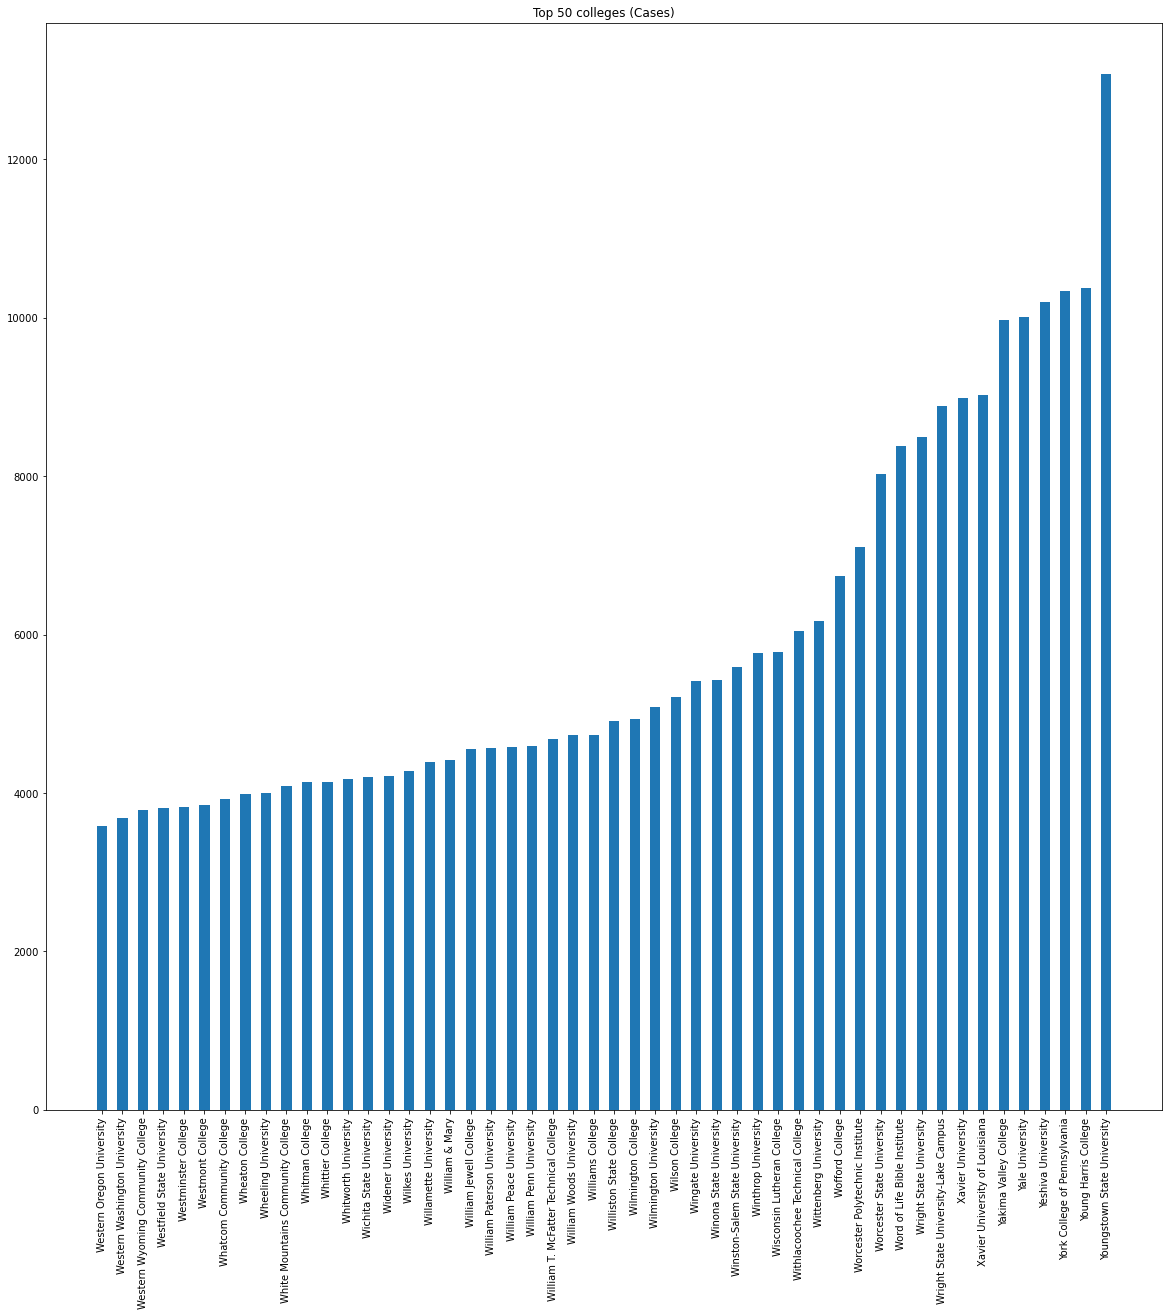

In [194]:
fig1, ax1 = plt.subplots(1, 1, figsize=(20, 20))

college_names = pd_cases_per_college.index

ax1.bar(college_names[-50:], total_college_cases[-50:], width=0.5, label=college_names)
ax1.set_title("Top 50 colleges (Cases)")

plt.xticks(college_names[-50:], college_names[-50:], rotation='vertical')

plt.show()

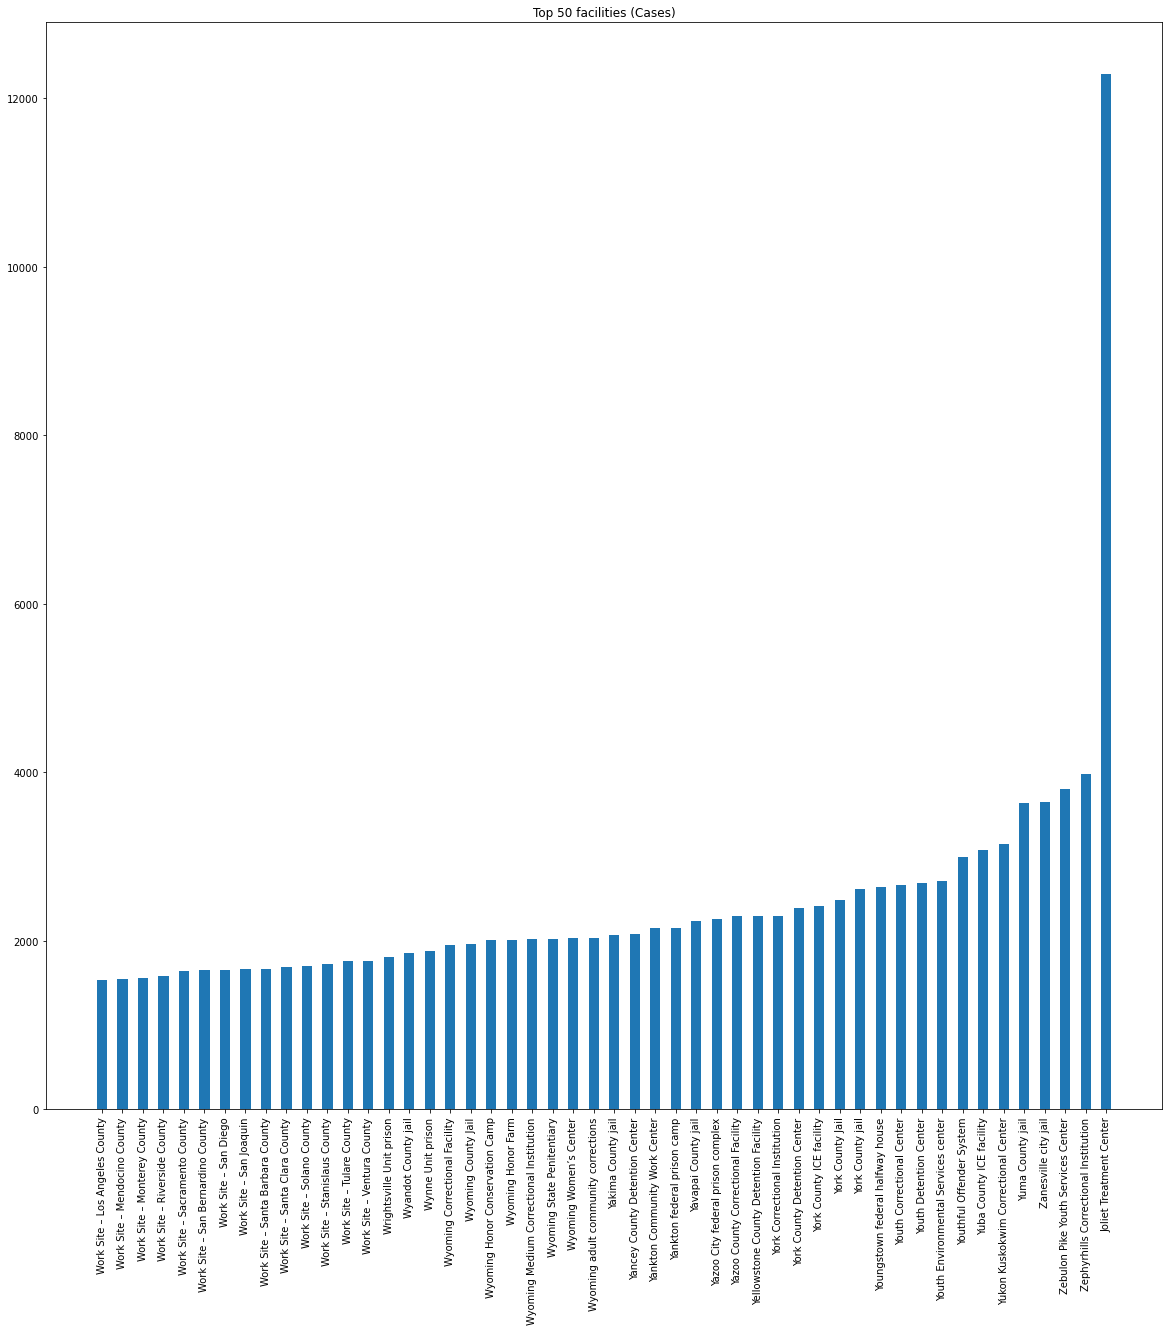

In [195]:
pd_stat_per_facility = pd.pivot_table(
    df_prisons,
    index='facility_name',
    values=['total_inmate_cases', 'total_officer_cases', "total_inmate_deaths", 'total_officer_deaths', 'latest_inmate_population']
)
total_facilities_cases = (pd_stat_per_facility.total_inmate_cases + pd_stat_per_facility.total_officer_cases).sort_values()
facilities_names = pd_stat_per_facility.index

fig2, ax2 = plt.subplots(1, 1, figsize=(20, 20))


ax2.bar(facilities_names[-50:], total_facilities_cases[-50:], width=0.5, label=facilities_names)
ax2.set_title('Top 50 facilities (Cases)')

plt.xticks(facilities_names[-50:], facilities_names[-50:], rotation='vertical')

plt.show()

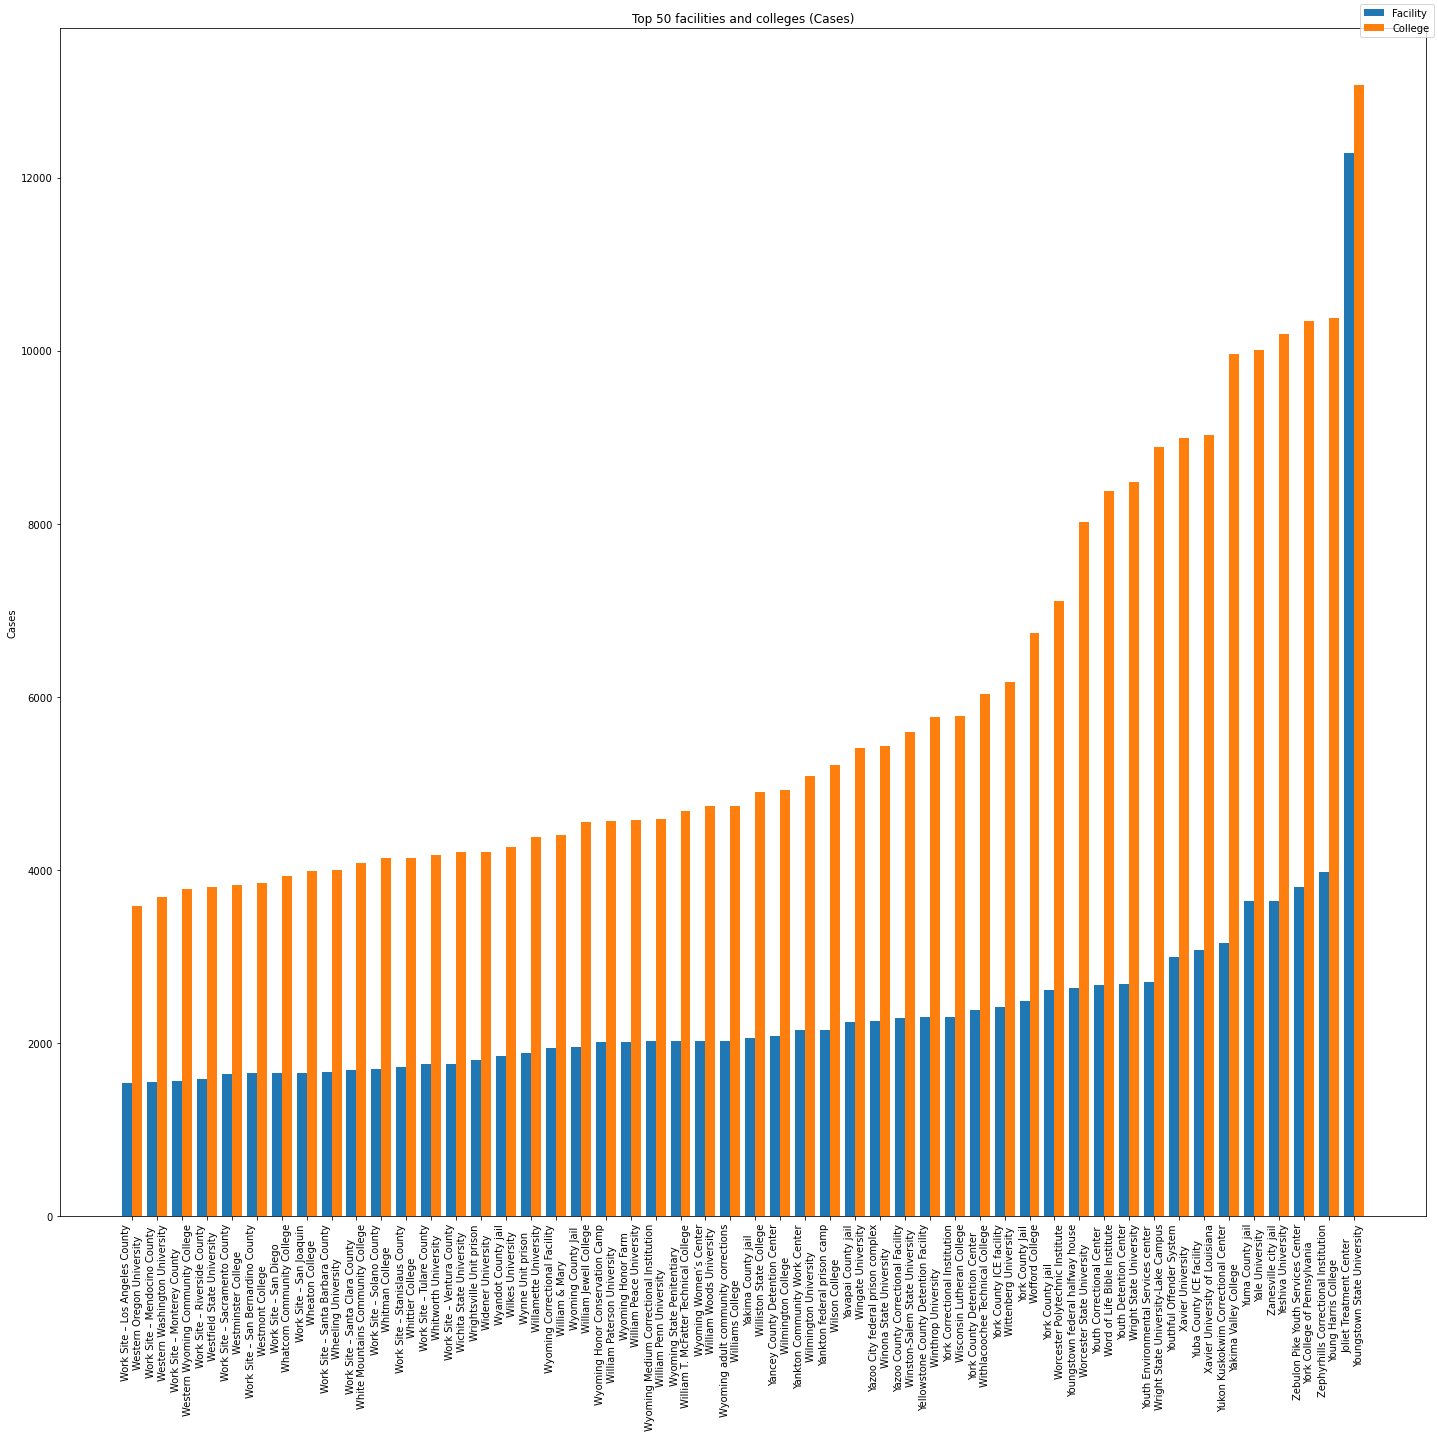

In [196]:
fig3, ax3 = plt.subplots(figsize=(20, 20))

names = facilities_names[-50:] + "\n" + college_names[-50:]

x = np.arange(len(names))
width = 0.4

ax3.bar(x - width/2, total_facilities_cases[-50:], width, label='Facility')
ax3.bar(x + width/2, total_college_cases[-50:], width, label='College')

ax3.set_ylabel('Cases')

plt.xticks(x, names, rotation='vertical')
ax3.set_title('Top 50 facilities and colleges (Cases)')

fig3.legend()
fig3.tight_layout()
plt.show()